In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten, SimpleRNN, LSTM, GRU, Bidirectional 


import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Sukamal/NLP 9-11/review.csv")

In [ ]:
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [ ]:
positive_review = ' '.join(df[df["sentiment"] == 1]["review"])
negative_review = ' '.join(df[df["sentiment"] == 0]["review"])

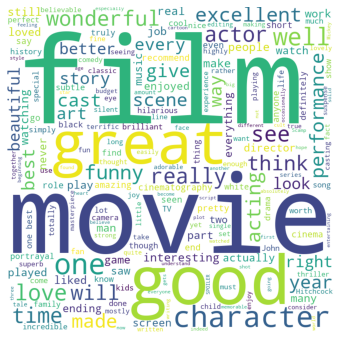

In [ ]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(positive_review)

plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

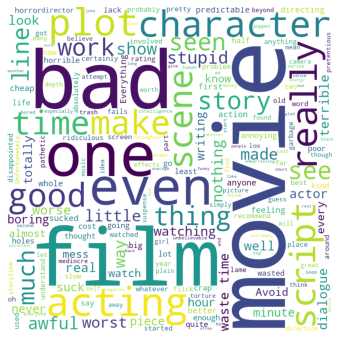

In [ ]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(negative_review)

plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [ ]:
## Remove emoji
'''
import re

def demojify(text):
    regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
                           "]+", flags = re.UNICODE)
    return regex_pattern.sub(r'',text)


df["review"] = df["review"].apply(demojify)
'''

In [ ]:
## emoji to text

# ! pip install emoji

# import emoji

#df["review"] = df["review"].apply(emoji.demojize)

In [ ]:
# Feature and Target

X = df["review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [ ]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
# vocabulary
tokenizer.index_word

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'is',
 6: 'this',
 7: 'it',
 8: 'i',
 9: 'to',
 10: 'in',
 11: 'was',
 12: 'movie',
 13: 'film',
 14: 'that',
 15: 'for',
 16: 'with',
 17: 'as',
 18: 'but',
 19: 'are',
 20: 'on',
 21: 'not',
 22: "it's",
 23: 'just',
 24: 'one',
 25: 'you',
 26: 'bad',
 27: 'an',
 28: 'all',
 29: 'so',
 30: 'about',
 31: 'at',
 32: 'very',
 33: 'there',
 34: 'like',
 35: 'good',
 36: 'by',
 37: 'from',
 38: 'have',
 39: 'time',
 40: 'he',
 41: 'out',
 42: 'even',
 43: 'acting',
 44: 'has',
 45: 'his',
 46: 'be',
 47: 'were',
 48: 'well',
 49: 'if',
 50: 'great',
 51: 'who',
 52: 'characters',
 53: 'how',
 54: 'more',
 55: 'my',
 56: 'or',
 57: 'really',
 58: 'see',
 59: 'when',
 60: 'some',
 61: 'than',
 62: 'no',
 63: 'best',
 64: 'plot',
 65: 'made',
 66: 'story',
 67: 'movies',
 68: 'character',
 69: "didn't",
 70: 'most',
 71: 'scenes',
 72: 'wonderful',
 73: 'its',
 74: 'better',
 75: "don't",
 76: '10',
 77: 'me',
 78: 'ever',
 79: 'they',
 80: 'what

In [ ]:
vocab_len = len(tokenizer.index_word)
vocab_len

2486

In [ ]:
# text to sequence
train_sequence = tokenizer.texts_to_sequences(X_train)

In [ ]:
doc_len = []

for doc in train_sequence:
  doc_len.append(len(doc))


In [ ]:
max(doc_len)

69

In [ ]:
np.quantile(doc_len, 0.99)

45.0

In [ ]:
max_length = 45

In [ ]:
# padding
train_matrix = sequence.pad_sequences(train_sequence,max_length)

In [ ]:
train_matrix

array([[  0,   0,   0, ..., 915, 532, 102],
       [  0,   0,   0, ...,   3, 377,  12],
       [  0,   0,   0, ...,   5, 378, 916],
       ...,
       [  0,   0,   0, ...,   3,  85,  12],
       [  0,   0,   0, ...,  20,   2,  20],
       [  0,   0,   0, ...,  22, 454, 840]], dtype=int32)

In [ ]:
# test data

test_sequence = tokenizer.texts_to_sequences(X_test)
test_matrix = sequence.pad_sequences(test_sequence,max_length)
test_matrix

array([[  0,   0,   0, ...,   3, 388, 111],
       [  0,   0,   0, ...,   9, 101,  77],
       [  0,   0,   0, ...,  42,  35,  15],
       ...,
       [  0,   0,   0, ...,   3,  35, 222],
       [  0,   0,   0, ...,  22,  23, 551],
       [  0,   0,   0, ...,  12,   5, 128]], dtype=int32)

In [ ]:
model = Sequential()
model.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model.add(SimpleRNN(64))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy")
model.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 2s 23ms/step - loss: 0.6934
Epoch 2/10
22/22 [==============================] - 0s 22ms/step - loss: 0.6070
Epoch 3/10
22/22 [==============================] - 1s 23ms/step - loss: 0.3315
Epoch 4/10
22/22 [==============================] - 0s 22ms/step - loss: 0.1059
Epoch 5/10
22/22 [==============================] - 1s 23ms/step - loss: 0.0412
Epoch 6/10
22/22 [==============================] - 0s 22ms/step - loss: 0.0208
Epoch 7/10
22/22 [==============================] - 1s 23ms/step - loss: 0.0091
Epoch 8/10
22/22 [==============================] - 0s 23ms/step - loss: 0.0056
Epoch 9/10
22/22 [==============================] - 0s 23ms/step - loss: 0.0033
Epoch 10/10
22/22 [==============================] - 0s 22ms/step - loss: 0.0021


In [ ]:
y_pred = model.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       151
           1       0.59      0.53      0.56       149

    accuracy                           0.59       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.59      0.59      0.59       300



In [ ]:
## Multi-layer RNN

model1 = Sequential()
model1.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model1.add(SimpleRNN(64, return_sequences=True))
model1.add(SimpleRNN(64, return_sequences=True))
model1.add(SimpleRNN(64))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(32, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

In [ ]:
model1.compile(optimizer="adam",loss="binary_crossentropy")
model1.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 14s 136ms/step - loss: 0.6999
Epoch 2/10
22/22 [==============================] - 3s 120ms/step - loss: 0.5845
Epoch 3/10
22/22 [==============================] - 3s 122ms/step - loss: 0.3237
Epoch 4/10
22/22 [==============================] - 2s 92ms/step - loss: 0.0905
Epoch 5/10
22/22 [==============================] - 2s 103ms/step - loss: 0.0365
Epoch 6/10
22/22 [==============================] - 3s 122ms/step - loss: 0.0194
Epoch 7/10
22/22 [==============================] - 2s 104ms/step - loss: 0.0071
Epoch 8/10
22/22 [==============================] - 2s 69ms/step - loss: 0.0034
Epoch 9/10
22/22 [==============================] - 1s 58ms/step - loss: 0.0017
Epoch 10/10
22/22 [==============================] - 1s 58ms/step - loss: 0.0012


In [ ]:
y_pred = model1.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.64      0.61       151
           1       0.60      0.55      0.57       149

    accuracy                           0.59       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.59      0.59      0.59       300



In [ ]:
## Bidirectional RNN

model2 = Sequential()
model2.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model2.add(Bidirectional(SimpleRNN(64)))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(32, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

In [ ]:
model2.compile(optimizer="adam",loss="binary_crossentropy")
model2.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 10s 83ms/step - loss: 0.6939
Epoch 2/10
22/22 [==============================] - 2s 77ms/step - loss: 0.5872
Epoch 3/10
22/22 [==============================] - 2s 73ms/step - loss: 0.2672
Epoch 4/10
22/22 [==============================] - 2s 74ms/step - loss: 0.0805
Epoch 5/10
22/22 [==============================] - 2s 70ms/step - loss: 0.0368
Epoch 6/10
22/22 [==============================] - 2s 70ms/step - loss: 0.0140
Epoch 7/10
22/22 [==============================] - 2s 72ms/step - loss: 0.0052
Epoch 8/10
22/22 [==============================] - 2s 69ms/step - loss: 0.0033
Epoch 9/10
22/22 [==============================] - 2s 76ms/step - loss: 0.0024
Epoch 10/10
22/22 [==============================] - 2s 70ms/step - loss: 0.0018


In [ ]:
y_pred = model2.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59       151
           1       0.58      0.57      0.58       149

    accuracy                           0.58       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.58      0.58      0.58       300



In [ ]:
# LSTM

model3 = Sequential()
model3.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model3.add(LSTM(64))
model3.add(Dense(64, activation="relu"))
model3.add(Dense(32, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))

In [ ]:
model3.compile(optimizer="adam",loss="binary_crossentropy")
model3.fit(train_matrix,y_train,epochs=10,batch_size=32)

Epoch 1/10
22/22 [==============================] - 11s 77ms/step - loss: 0.6921
Epoch 2/10
22/22 [==============================] - 2s 71ms/step - loss: 0.6394
Epoch 3/10
22/22 [==============================] - 2s 70ms/step - loss: 0.3430
Epoch 4/10
22/22 [==============================] - 2s 81ms/step - loss: 0.1148
Epoch 5/10
22/22 [==============================] - 2s 86ms/step - loss: 0.0464
Epoch 6/10
22/22 [==============================] - 2s 80ms/step - loss: 0.0197
Epoch 7/10
22/22 [==============================] - 1s 66ms/step - loss: 0.0142
Epoch 8/10
22/22 [==============================] - 2s 71ms/step - loss: 0.0104
Epoch 9/10
22/22 [==============================] - 2s 70ms/step - loss: 0.0088
Epoch 10/10
22/22 [==============================] - 2s 69ms/step - loss: 0.0035


In [ ]:
y_pred = model3.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.78      0.73      0.75       149

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [ ]:
# Multi-layer LSTM

model4 = Sequential()
model4.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model4.add(LSTM(64, return_sequences=True))
model4.add(LSTM(64))
model4.add(Dense(64, activation="relu"))
model4.add(Dense(1, activation="sigmoid"))

In [ ]:
model4.compile(optimizer="adam",loss="binary_crossentropy")
model4.fit(train_matrix,y_train,epochs=20,batch_size=8)

Epoch 1/20
88/88 [==============================] - 13s 63ms/step - loss: 0.6881
Epoch 2/20
88/88 [==============================] - 6s 63ms/step - loss: 0.3957
Epoch 3/20
88/88 [==============================] - 6s 63ms/step - loss: 0.1018
Epoch 4/20
88/88 [==============================] - 6s 63ms/step - loss: 0.0373
Epoch 5/20
88/88 [==============================] - 6s 63ms/step - loss: 0.0163
Epoch 6/20
88/88 [==============================] - 6s 63ms/step - loss: 0.0110
Epoch 7/20
88/88 [==============================] - 6s 72ms/step - loss: 0.0063
Epoch 8/20
88/88 [==============================] - 6s 63ms/step - loss: 0.0045
Epoch 9/20
88/88 [==============================] - 5s 62ms/step - loss: 0.0444
Epoch 10/20
88/88 [==============================] - 5s 62ms/step - loss: 0.0172
Epoch 11/20
88/88 [==============================] - 5s 62ms/step - loss: 0.0113
Epoch 12/20
88/88 [==============================] - 5s 62ms/step - loss: 0.0031
Epoch 13/20
88/88 [=================

In [ ]:
y_pred = model4.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       151
           1       0.77      0.77      0.77       149

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [ ]:
# Bidirectional LSTM and Multi-layer

model5 = Sequential()
model5.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model5.add(Bidirectional(LSTM(64, return_sequences=True)))
model5.add(Bidirectional(LSTM(64)))
model5.add(Dense(64, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))

In [ ]:
model5.compile(optimizer="adam",loss="binary_crossentropy")
model5.fit(train_matrix,y_train,epochs=20,batch_size=8)

Epoch 1/20
88/88 [==============================] - 32s 101ms/step - loss: 0.6768
Epoch 2/20
88/88 [==============================] - 9s 101ms/step - loss: 0.3800
Epoch 3/20
88/88 [==============================] - 9s 101ms/step - loss: 0.1048
Epoch 4/20
88/88 [==============================] - 9s 100ms/step - loss: 0.0305
Epoch 5/20
88/88 [==============================] - 9s 101ms/step - loss: 0.0181
Epoch 6/20
88/88 [==============================] - 9s 101ms/step - loss: 0.0129
Epoch 7/20
88/88 [==============================] - 9s 101ms/step - loss: 0.0184
Epoch 8/20
88/88 [==============================] - 9s 101ms/step - loss: 0.0188
Epoch 9/20
88/88 [==============================] - 9s 101ms/step - loss: 0.0042
Epoch 10/20
88/88 [==============================] - 9s 100ms/step - loss: 0.0012
Epoch 11/20
88/88 [==============================] - 9s 101ms/step - loss: 6.9494e-04
Epoch 12/20
88/88 [==============================] - 9s 101ms/step - loss: 4.7598e-04
Epoch 13/20
88/8

In [ ]:
y_pred = model5.predict(test_matrix)

y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       151
           1       0.76      0.71      0.74       149

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300

